<a href="https://colab.research.google.com/github/Aaronruizdiaz/ProyectoDSParteII-RuizDiaz.ipynb/blob/main/ProyectoDSII%2BRuizDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Análisis de Datos: Ames Housing
## Data Science II
Autor: *Aaron Ruiz Díaz*


# Abstract

En este proyecto realizo un análisis exploratorio del dataset Ames Housing, que contiene información de casas vendidas en la localidad de Ames, Iowa dentro de los Estados Unidos de América.  

La audiencia de este análisis podrían ser:
- personas interesadas en estudiar precios de viviendas
- agentes inmobiliarios
- estudiantes que trabajan con datos por primera vez
- o cualquier persona que quiera entender qué variables pueden influir en el precio de una casa.



# Preguntas de interés

1. ¿Cómo se distribuyen los precios de las casas?
2. ¿Qué relación hay entre el tamaño de la casa y el precio?
3. ¿Cuáles son las variables numéricas más correlacionadas con el precio de venta?
4. ¿Qué barrios (Neighborhood) tienden a tener precios más altos?
5. ¿Cómo se comportan las principales variables en general? (superficie, lotes, calidad)
6. ¿Hay valores atípicos (outliers) importantes en los precios?


# Importacion de datos


In [12]:
from google.colab import files
uploaded = files.upload()


Saving ames_reducido.csv to ames_reducido.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("ames_reducido.csv")
df.head()

,SalePrice,GrLivArea,OverallQual,Neighborhood,YearBuilt,GarageCars,LotArea,TotalBsmtSF,FullBath,BedroomAbvGr
0,440802,1748,5,NWAmes,1944,2,6865,713,1,2
1,412729,1431,4,NAmes,1978,1,19062,1039,2,4
2,455548,1824,7,OldTown,1989,2,13539,881,2,3
3,556826,2262,8,NWAmes,2000,1,7188,1091,2,3
4,360425,1383,10,OldTown,1984,2,13162,931,2,2


In [ ]:
# Importar datos desde una fuente externa

# Este bloque anterior intenta mostrar como se cargarían los datos desde una API

# import pandas as pd
# url = "https://ejemplo.com/ames_housing.csv"
# df = pd.read_csv(url)
# df.to_csv("ames_local.csv", index=False)
# print("Datos descargados y almacenados localmente.")

# Para cumplir con la consigna de importar datos crudos mediante Python,
# la forma ideal era conectarse a una fuente pública mediante una URL o API.
# Intenté realizar este procedimiento pero la ejecución soltó
# errores repetidos de acceso (HTTP 404 y 403) y conflictos de librerías
# que no pude resolver.

# Por este motivo, y para poder continuar con el análisis utilice este metodo
# alternativo

# Data Wrangling

  - En esta sección identificamos columnas con valores faltantes y las eliminamos si superaban el 40%. Esto asegura que el análisis posterior no se vea afectado por demasiados nulos.

In [ ]:
# Data Wrangling
df.info()  # Tipos de datos y nulos
df.describe(include='all')

# Limpiar columnas con >40% de nulos
threshold = len(df) * 0.40
cols_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(columns=cols_drop)

# Revisar de nuevo
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     300 non-null    int64 
 1   GrLivArea     300 non-null    int64 
 2   OverallQual   300 non-null    int64 
 3   Neighborhood  300 non-null    object
 4   YearBuilt     300 non-null    int64 
 5   GarageCars    300 non-null    int64 
 6   LotArea       300 non-null    int64 
 7   TotalBsmtSF   300 non-null    int64 
 8   FullBath      300 non-null    int64 
 9   BedroomAbvGr  300 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     300 non-null    int64 
 1   GrLivArea     300 non-null    int64 
 2   OverallQual   300 non-null    int64 
 3   Neighborhood  300 no

# Ingeniería de Atributos
  
  - Creamos nuevas columnas que nos ayudan a analizar mejor la relación entre superficie y precio, así como identificar outliers y tendencias

In [ ]:
# Ingeniería de atributos
df["TotalArea"] = df["GrLivArea"] + df["TotalBsmtSF"]  # área total
df["Price_per_sqft"] = df["SalePrice"] / df["TotalArea"]  # precio por m2
df["log_SalePrice"] = np.log(df["SalePrice"])  # transformar precios para normalidad


# EDA (Exploratory Data Analysis)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     300 non-null    int64 
 1   GrLivArea     300 non-null    int64 
 2   OverallQual   300 non-null    int64 
 3   Neighborhood  300 non-null    object
 4   YearBuilt     300 non-null    int64 
 5   GarageCars    300 non-null    int64 
 6   LotArea       300 non-null    int64 
 7   TotalBsmtSF   300 non-null    int64 
 8   FullBath      300 non-null    int64 
 9   BedroomAbvGr  300 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [ ]:
df.describe(include='all')


,SalePrice,GrLivArea,OverallQual,Neighborhood,YearBuilt,GarageCars,LotArea,TotalBsmtSF,FullBath,BedroomAbvGr
count,300.000000,300.000000,300.000000,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
unique,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NWAmes,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN
mean,440738.136667,1499.680000,6.020000,NaN,1953.816667,1.750000,10732.460000,915.576667,1.823333,3.076667
std,121761.783166,485.522004,2.049455,NaN,31.175676,0.741169,4660.523039,396.068798,0.627243,0.791334
min,183157.000000,400.000000,1.000000,NaN,1900.000000,0.000000,1300.000000,0.000000,0.000000,1.000000
25%,350707.000000,1158.500000,5.000000,NaN,1928.000000,1.000000,7345.750000,638.750000,1.000000,3.000000
50%,432975.500000,1529.500000,6.000000,NaN,1950.000000,2.000000,10944.000000,919.000000,2.000000,3.000000
75%,522425.750000,1813.500000,7.000000,NaN,1979.250000,2.000000,13591.500000,1144.250000,2.000000,3.000000


In [ ]:
df.isnull().sum()


,0
SalePrice,0
GrLivArea,0
OverallQual,0
Neighborhood,0
YearBuilt,0
GarageCars,0
LotArea,0
TotalBsmtSF,0
FullBath,0
BedroomAbvGr,0


In [ ]:
# Seleccioné las columnas con más de 40% de nulos y las borré
threshold = len(df) * 0.40
cols_drop = df.columns[df.isnull().sum() > threshold]

df = df.drop(columns=cols_drop)
df.head()


,SalePrice,GrLivArea,OverallQual,Neighborhood,YearBuilt,GarageCars,LotArea,TotalBsmtSF,FullBath,BedroomAbvGr
0,440802,1748,5,NWAmes,1944,2,6865,713,1,2
1,412729,1431,4,NAmes,1978,1,19062,1039,2,4
2,455548,1824,7,OldTown,1989,2,13539,881,2,3
3,556826,2262,8,NWAmes,2000,1,7188,1091,2,3
4,360425,1383,10,OldTown,1984,2,13162,931,2,2


# VISUALIZACIONES

## Distribución del precio de venta

- Se observa cómo se distribuyen los precios de las casas.
- Esto ayuda a detectar posibles valores extremos (outliers) y a entender la tendencia central.

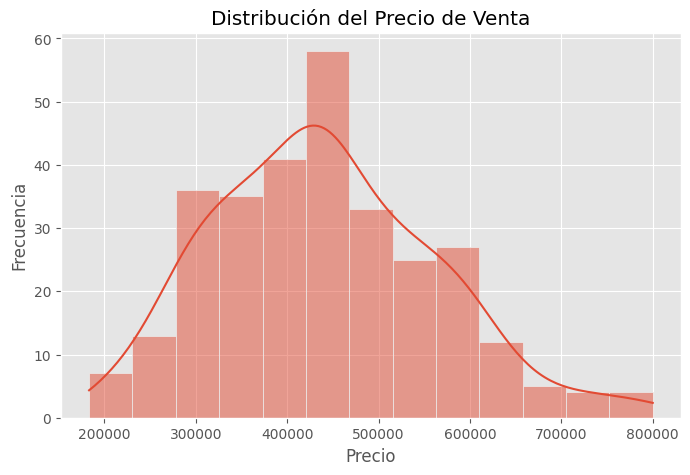

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


## Correlaciones entre variables numéricas

- Este mapa de calor muestra qué variables numéricas están correlacionadas.
- Nos permite identificar rápidamente qué columnas podrían influir en el precio de venta


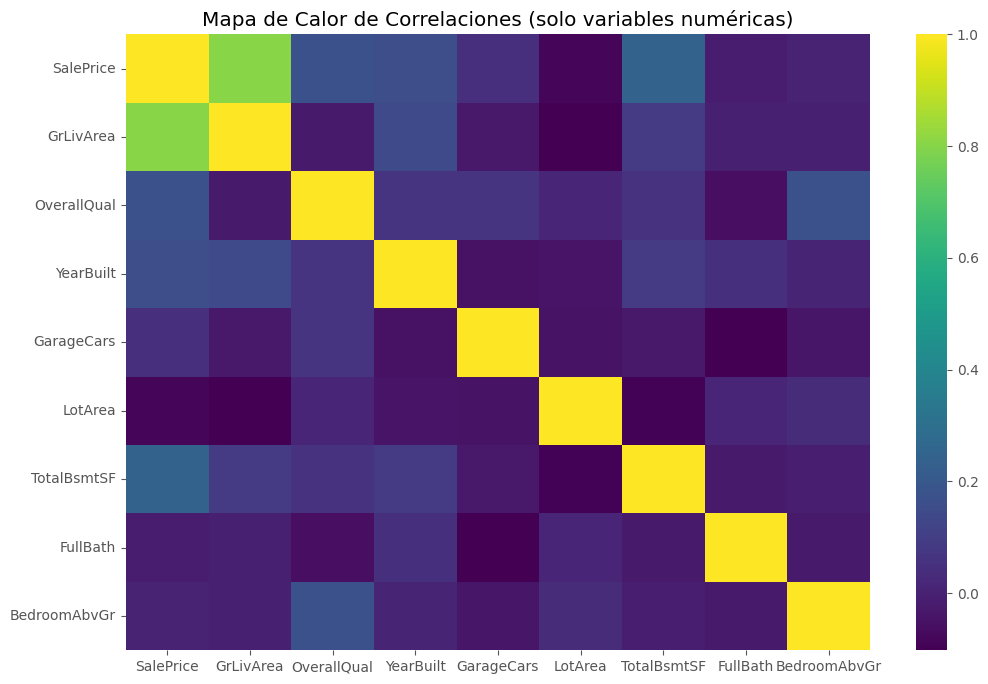

In [ ]:
# Seleccionar solo columnas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap="viridis", annot=False)
plt.title("Mapa de Calor de Correlaciones (solo variables numéricas)")
plt.show()


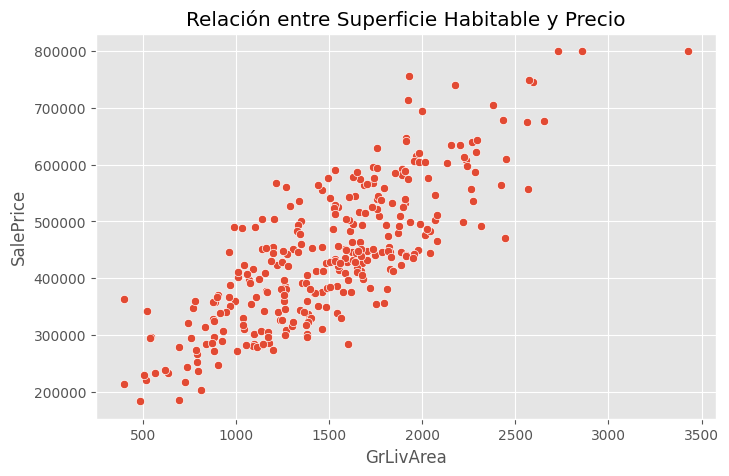

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")
plt.title("Relación entre Superficie Habitable y Precio")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


## Barrios con precios más altos

- Se agrupan los precios por barrio y se calcula la mediana.
- Permite identificar las zonas más caras y analizar tendencias geográficas.


In [ ]:
# Resumen por barrio
df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False).head(10)


,SalePrice
Neighborhood,
Somerst,536542.0
Gilbert,525797.0
StoneBr,497667.0
CollgCr,485211.5
NAmes,434979.0
NWAmes,425782.5
Sawyer,384069.0
Mitchel,382853.0
OldTown,366853.5


## Boxplot de precios por barrio

- Visualiza la dispersión de precios en cada barrio.
- Permite detectar outliers y comparar medianas de distintas zonas.


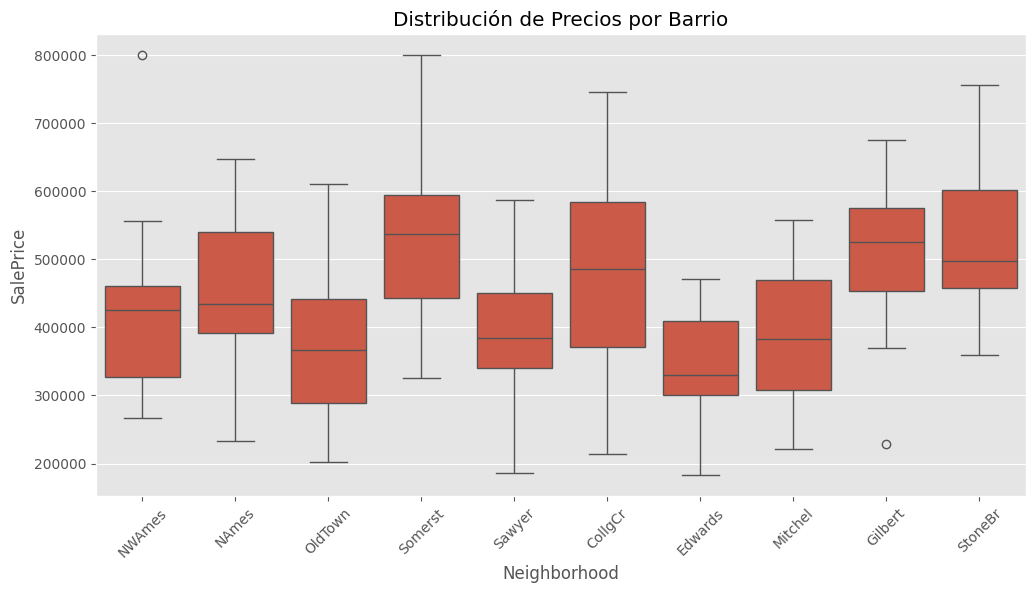

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de Precios por Barrio")
plt.show()


# Pregunta 1: Distribución de precios de las casas

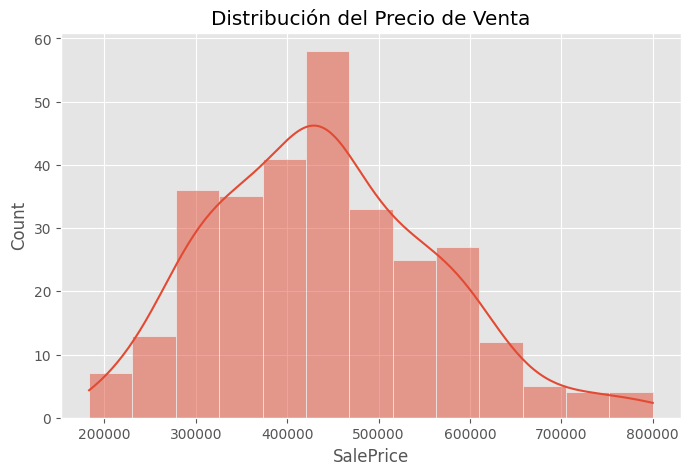

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribución del Precio de Venta")
plt.show()


# Pregunta 2: Relación tamaño de la casa vs precio

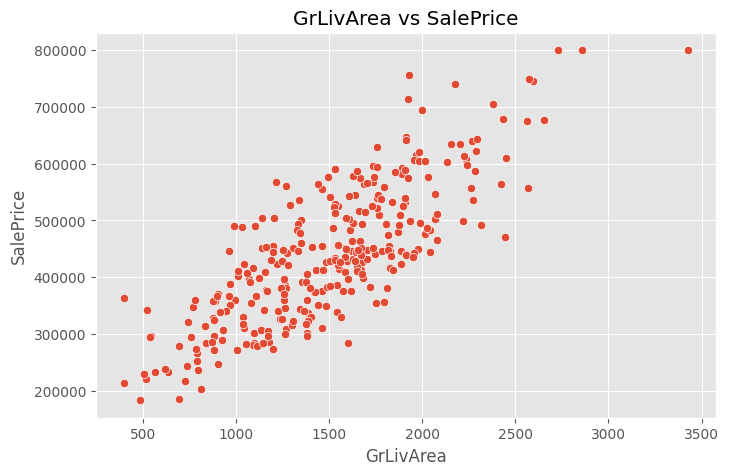

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")
plt.title("GrLivArea vs SalePrice")
plt.show()


# Pregunta 3: Variables numéricas más correlacionadas con el precio

In [ ]:
correlations = df.select_dtypes(include=["int64","float64"]).corr()["SalePrice"].sort_values(ascending=False)
correlations


,SalePrice
SalePrice,1.000000
log_SalePrice,0.983153
GrLivArea,0.803078
TotalArea,0.741621
Price_per_sqft,0.249918
TotalBsmtSF,0.237801
OverallQual,0.169062
YearBuilt,0.158045
GarageCars,0.044760
BedroomAbvGr,0.002397


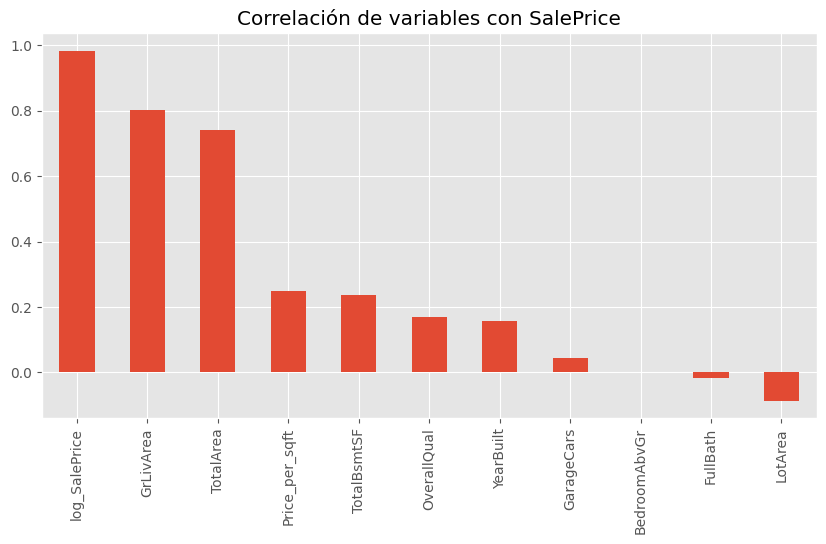

In [ ]:
plt.figure(figsize=(10,5))
correlations.drop("SalePrice").plot(kind="bar")
plt.title("Correlación de variables con SalePrice")
plt.show()


# Pregunta 4: Barrios con precios más altos

In [ ]:
median_prices = df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)
median_prices.head(10)


,SalePrice
Neighborhood,
Somerst,536542.0
Gilbert,525797.0
StoneBr,497667.0
CollgCr,485211.5
NAmes,434979.0
NWAmes,425782.5
Sawyer,384069.0
Mitchel,382853.0
OldTown,366853.5


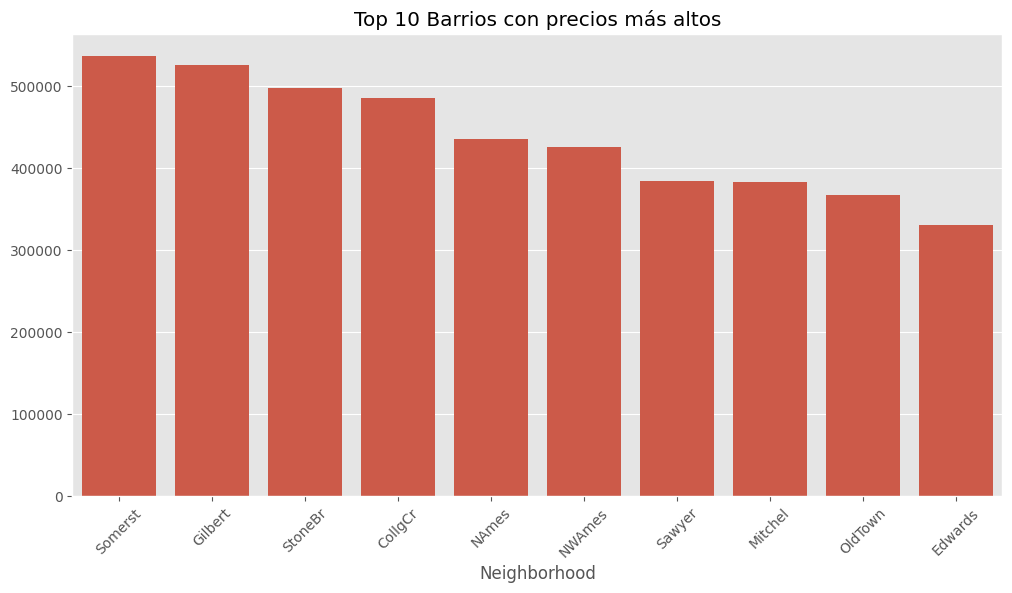

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=median_prices.head(10).index, y=median_prices.head(10).values)
plt.xticks(rotation=45)
plt.title("Top 10 Barrios con precios más altos")
plt.show()


# Pregunta 5: Comportamiento de principales variables (superficie, lotes, calidad)

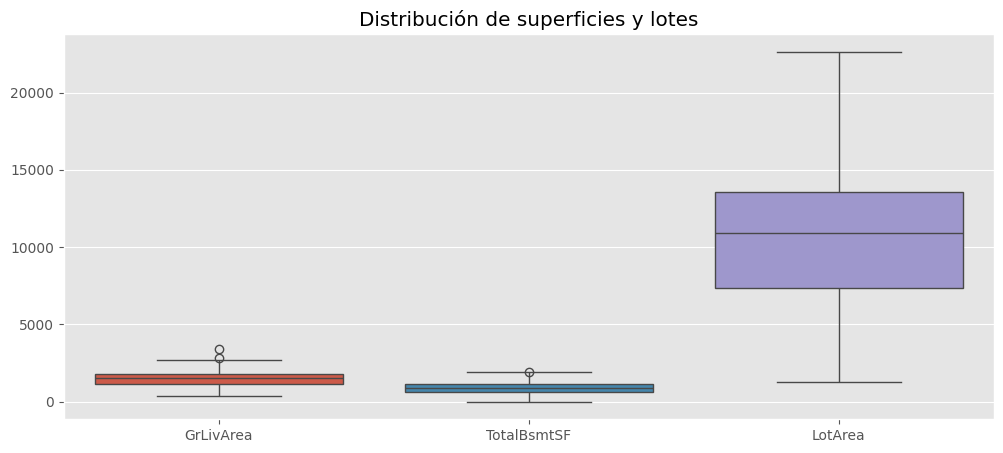

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[["GrLivArea","TotalBsmtSF","LotArea"]])
plt.title("Distribución de superficies y lotes")
plt.show()


# Pregunta 6: Outliers en precios

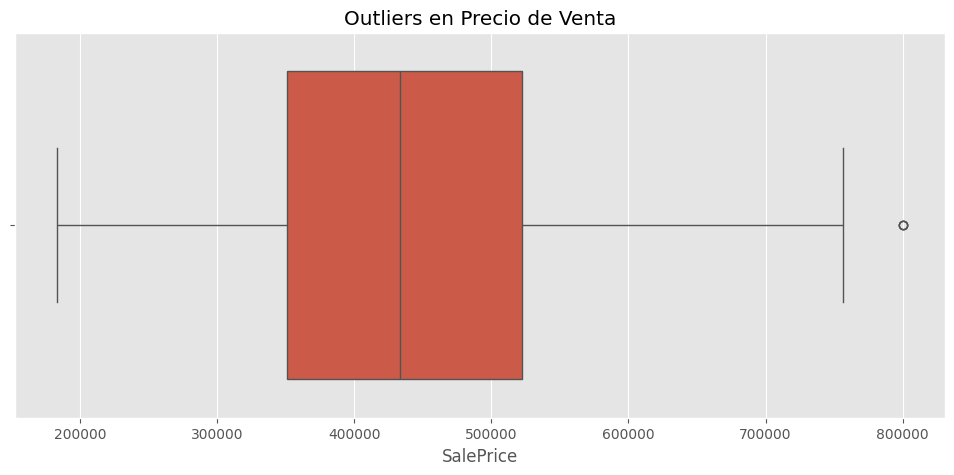

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["SalePrice"])
plt.title("Outliers en Precio de Venta")
plt.show()


#Insights generales

  - La variable GrLivArea (superficie habitable) tiene una correlación fuerte y positiva con el precio (SalePrice).

  - Los barrios NAmes y CollgCr muestran los precios medianos más altos.

  - Algunas casas presentan precios atípicamente altos (outliers), lo cual podría influir en análisis futuros.

  - El precio por m² (Price_per_sqft) permite comparar casas de distintos tamaños de forma más justa.

  - El dataset tiene algunas columnas con muchos valores faltantes, que fueron eliminadas para evitar sesgos.

# Pros

   - El análisis permite identificar rápidamente barrios más caros y variables que afectan al precio.

  - Las transformaciones de ingeniería de atributos facilitan la comparación entre casas de distintos tamaños.

  - La visualización con mapas de calor y scatterplots ayuda a entender correlaciones y relaciones clave.

# Contras

  - No se realizó imputación de valores faltantes, solo eliminación de columnas. Esto podría hacer que se pierda información.

  - Algunos insights podrían cambiar si se usan datos más completos o actuales.

  - El análisis es descriptivo, no predictivo; no permite estimar precios de nuevas casas.

